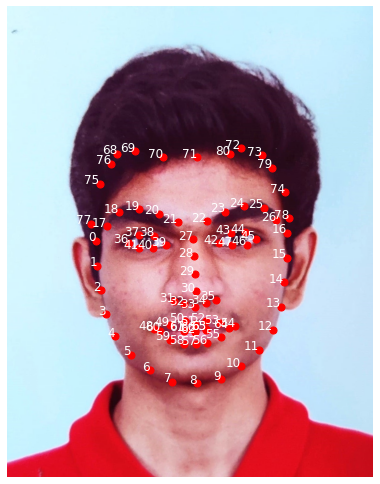

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import tkinter as tk
import cv2

class LandmarkEditor:
    def __init__(self, image_path, landmarks_csv):
        self.image_path = image_path
        self.landmarks_csv = landmarks_csv
        
        # Load the image
        self.image = cv2.imread(self.image_path)
        self.image = cv2.cvtColor(self.image, cv2.COLOR_BGR2RGB)
        
        # Load landmarks from CSV
        self.landmarks_df = pd.read_csv(self.landmarks_csv)
        
        # Initialize GUI
        self.root = tk.Tk()
        self.root.title("Landmark Editor")
        
        # Create Matplotlib figure
        self.fig, self.ax = plt.subplots()
        self.ax.imshow(self.image)
        
        # Create Matplotlib canvas
        self.canvas = FigureCanvasTkAgg(self.fig, master=self.root)
        self.canvas.draw()
        self.canvas.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=1)
        
        # Plot initial landmarks
        self.plot_landmarks()
        
        # Register mouse click event
        self.cid = self.fig.canvas.mpl_connect('button_press_event', self.onclick)
        
        # Create 'Save' button
        self.save_button = tk.Button(self.root, text="Save", command=self.save_landmarks)
        self.save_button.pack(side=tk.BOTTOM)
        
        # Run the GUI
        self.root.mainloop()
    
    def plot_landmarks(self):
        # Clear previous landmarks
        self.ax.clear()
        self.ax.imshow(self.image)
        
        # Plot each landmark point with its ID label
        for index, row in self.landmarks_df.iterrows():
            x, y = row['X'], row['Y']
            self.ax.scatter(x, y, color='red', s=50)  # Plot the point
            self.ax.text(x, y, str(index), color='white', fontsize=12, ha='right')  # Label with landmark ID
        
        self.ax.axis('off')
        self.canvas.draw()
    
    def onclick(self, event):
        # Get the clicked coordinates
        x, y = event.xdata, event.ydata
        if x is not None and y is not None:
            # Append new landmark to DataFrame
            new_landmark = {'X': x, 'Y': y}
            self.landmarks_df = self.landmarks_df.append(new_landmark, ignore_index=True)
            # Plot updated landmarks
            self.plot_landmarks()
    
    def save_landmarks(self):
        # Save updated landmarks to CSV
        self.landmarks_df.to_csv('updated_landmarks.csv', index=False)
        print("Updated landmarks saved to 'updated_landmarks.csv'")

# Example usage:
image_path = 'SanskarJadhavpic.jpeg'  # Path to your image
landmarks_csv = 'landmarks_image_2.csv'  # Path to your landmarks CSV

LandmarkEditor(image_path, landmarks_csv)

<ipython-input-4-2ee9d15101bd>:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.landmarks_df = self.landmarks_df.append(new_landmark, ignore_index=True)
<ipython-input-4-2ee9d15101bd>:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.landmarks_df = self.landmarks_df.append(new_landmark, ignore_index=True)
<ipython-input-4-2ee9d15101bd>:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.landmarks_df = self.landmarks_df.append(new_landmark, ignore_index=True)
<ipython-input-4-2ee9d15101bd>:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.landmarks_df = self.landmarks_df.append(new_landmark, ignore_index=True)
<ipython

Updated landmarks saved to 'updated_landmarks.csv'


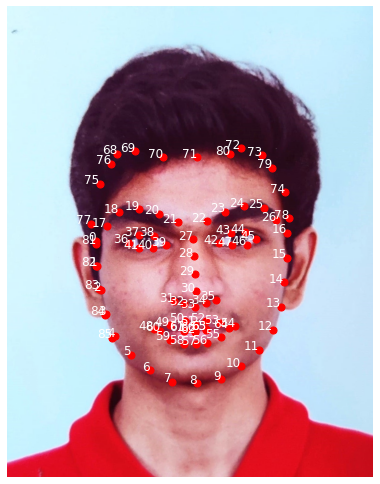

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import tkinter as tk
import cv2

class LandmarkEditor:
    _instance = None
    
    def __new__(cls, *args, **kwargs):
        if not cls._instance:
            cls._instance = super().__new__(cls)
        return cls._instance

    def __init__(self, image_path, landmarks_csv):
        self.image_path = image_path
        self.landmarks_csv = landmarks_csv
        
        # Check if Tk instance already exists
        if not hasattr(self, 'root'):
            # Initialize GUI
            self.root = tk.Tk()
            self.root.title("Landmark Editor")
            
            # Create Matplotlib figure
            self.fig, self.ax = plt.subplots()
            
            # Create Matplotlib canvas
            self.canvas = FigureCanvasTkAgg(self.fig, master=self.root)
            self.canvas.draw()
            self.canvas.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=1)
            
            # Create 'Save' button
            self.save_button = tk.Button(self.root, text="Save", command=self.save_landmarks)
            self.save_button.pack(side=tk.BOTTOM)
            
            # Register mouse click event
            self.cid = self.fig.canvas.mpl_connect('button_press_event', self.onclick)
        
        # Load the image
        self.image = cv2.imread(self.image_path)
        self.image = cv2.cvtColor(self.image, cv2.COLOR_BGR2RGB)
        
        # Load landmarks from CSV
        self.landmarks_df = pd.read_csv(self.landmarks_csv)
        
        # Plot initial landmarks
        self.plot_landmarks()
        
        # Run the GUI
        self.root.mainloop()
    
    def plot_landmarks(self):
        # Clear previous landmarks
        self.ax.clear()
        self.ax.imshow(self.image)
        
        # Plot each landmark point with its ID label
        for index, row in self.landmarks_df.iterrows():
            x, y = row['X'], row['Y']
            self.ax.scatter(x, y, color='red', s=50)  # Plot the point
            self.ax.text(x, y, str(index), color='white', fontsize=12, ha='right')  # Label with landmark ID
        
        self.ax.axis('off')
        self.canvas.draw()
    
    def onclick(self, event):
        # Get the clicked coordinates
        x, y = event.xdata, event.ydata
        if x is not None and y is not None:
            # Append new landmark to DataFrame
            new_landmark = {'X': x, 'Y': y}
            self.landmarks_df = self.landmarks_df.append(new_landmark, ignore_index=True)
            # Plot updated landmarks
            self.plot_landmarks()
    
    def save_landmarks(self):
        # Save updated landmarks to CSV
        self.landmarks_df.to_csv('updated_landmarks.csv', index=False)
        print("Updated landmarks saved to 'updated_landmarks.csv'")

# Example usage:
image_path = 'SanskarJadhavpic.jpeg'  # Path to your image
landmarks_csv = 'landmarks_image_2.csv'  # Path to your landmarks CSV

LandmarkEditor(image_path, landmarks_csv)

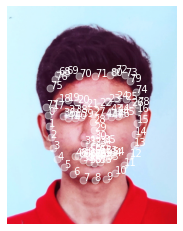

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import tkinter as tk
import cv2
import mplcursors

class LandmarkEditor:
    _instance = None
    
    def __new__(cls, *args, **kwargs):
        if not cls._instance:
            cls._instance = super().__new__(cls)
        return cls._instance

    def __init__(self, image_path, landmarks_csv):
        self.image_path = image_path
        self.landmarks_csv = landmarks_csv
        
        # Load the image
        self.image = cv2.imread(self.image_path)
        self.image = cv2.cvtColor(self.image, cv2.COLOR_BGR2RGB)
        
        # Initialize GUI
        self.root = tk.Tk()
        self.root.title("Landmark Editor")
        
        # Create Matplotlib figure
        self.fig, self.ax = plt.subplots()
        self.ax.imshow(self.image)
        
        # Create Matplotlib canvas
        self.canvas = FigureCanvasTkAgg(self.fig, master=self.root)
        self.canvas.draw()
        self.canvas.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=1)
        
        # Create 'Save' button
        self.save_button = tk.Button(self.root, text="Save", command=self.save_landmarks)
        self.save_button.pack(side=tk.BOTTOM)
        
        # Enable zooming
        mplcursors.cursor(hover=True)
        
        # Load landmarks from CSV
        self.landmarks_df = pd.read_csv(self.landmarks_csv)
        
        # Plot initial landmarks
        self.plot_landmarks()
        
        # Run the GUI
        self.root.mainloop()
        
    
    def plot_landmarks(self):
        # Clear previous landmarks
        self.ax.clear()
        self.ax.imshow(self.image)
        
        # Plot old landmarks with transparency (black color)
        old_landmarks = self.landmarks_df.iloc[:81]
        for index, row in old_landmarks.iterrows():
            x, y = row['X'], row['Y']
            self.ax.scatter(x, y, color='white', s=50, alpha=0.4)  # Old landmarks with transparency
            self.ax.text(x, y, str(index), color='white', fontsize=10)  # Label with landmark ID
        
        # Plot newly clicked landmarks without transparency (red color)
        new_landmarks = self.landmarks_df.iloc[81:]
        for index, row in new_landmarks.iterrows():
            x, y = row['X'], row['Y']
            self.ax.scatter(x, y, color='red', s=100, alpha=0.8)  # Newly clicked landmarks without transparency
            self.ax.text(x, y, str(index), color='red', fontsize=10)  # Label with landmark ID
    
        self.ax.axis('off')
        self.canvas.draw()


        
    def onclick(self, event):
        # Get the clicked coordinates
        x, y = event.xdata, event.ydata
        if x is not None and y is not None:
            # Round coordinates to integers
            x_int = int(round(x))
            y_int = int(round(y))
            # Append new landmark to DataFrame
            new_landmark = pd.DataFrame({'X': [x_int], 'Y': [y_int]})
            self.landmarks_df = pd.concat([self.landmarks_df, new_landmark], ignore_index=True)
            # Plot updated landmarks
            self.plot_landmarks()

    
    def save_landmarks(self):
        # Save updated landmarks to CSV
        self.landmarks_df.to_csv('updated_landmarks.csv', index=False)
        print("Updated landmarks saved to 'updated_landmarks.csv'")

# Example usage:
image_path = 'SanskarJadhavpic.jpeg'  # Path to your image
landmarks_csv = 'landmarks_image_2.csv'  # Path to your landmarks CSV

LandmarkEditor(image_path, landmarks_csv)

In [14]:
!pip install mplcursors

     ---------------------------------------- 88.8/88.8 kB 1.7 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'


DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


  Created wheel for mplcursors: filename=mplcursors-0.5.3-py3-none-any.whl size=20744 sha256=55b2d0abcbc2ef0d8f181d94083722972d3b732d53ba53df26bbd189d337af80
  Stored in directory: c:\users\sanskar\appdata\local\pip\cache\wheels\ee\99\34\ec8343516b3373172a6d67f96ff46b27c4d803a88700e4e3eb
Successfully built mplcursors


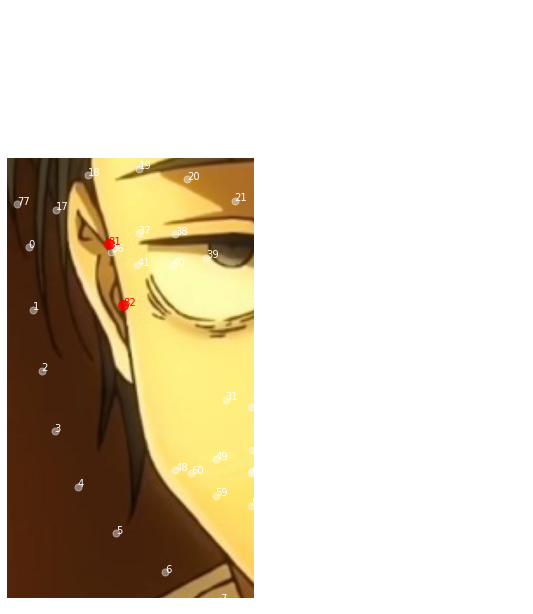

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import tkinter as tk
import cv2
import mplcursors
from matplotlib.backends.backend_tkagg import NavigationToolbar2Tk

class LandmarkEditor:
    _instance = None
    
    def __new__(cls, *args, **kwargs):
        if not cls._instance:
            cls._instance = super().__new__(cls)
        return cls._instance

    def __init__(self, image_path, landmarks_csv):
        self.image_path = image_path
        self.landmarks_csv = landmarks_csv
        
        # Load the image
        self.image = cv2.imread(self.image_path)
        self.image = cv2.cvtColor(self.image, cv2.COLOR_BGR2RGB)
        
        # Initialize GUI
        self.root = tk.Tk()
        self.root.title("Landmark Editor")
        
        # Create Matplotlib figure
        self.fig, self.ax = plt.subplots()
        
        # Display the image
        self.ax.imshow(self.image)
        
        # Create Matplotlib canvas
        self.canvas = FigureCanvasTkAgg(self.fig, master=self.root)
        self.canvas.draw()
        self.canvas.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=1)
        
        # Add navigation toolbar for zooming
        toolbar = NavigationToolbar2Tk(self.canvas, self.root)
        toolbar.update()
        self.canvas.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=1)
        
        # Create 'Save' button
        self.save_button = tk.Button(self.root, text="Save", command=self.save_landmarks)
        self.save_button.pack(side=tk.BOTTOM)
        
        # Enable zooming
        mplcursors.cursor(hover=True)
        
        # Load landmarks from CSV
        self.landmarks_df = pd.read_csv(self.landmarks_csv)
        
        # Plot initial landmarks
        self.plot_landmarks()
        
        # Register mouse click event
        self.cid = self.fig.canvas.mpl_connect('button_press_event', self.onclick)
        
        # Run the GUI
        self.root.mainloop()
    
    def plot_landmarks(self):
        # Clear previous landmarks
        self.ax.clear()
        self.ax.imshow(self.image)
        
        # Plot old landmarks with transparency (black color)
        old_landmarks = self.landmarks_df.iloc[:81]
        for index, row in old_landmarks.iterrows():
            x, y = row['X'], row['Y']
            self.ax.scatter(x, y, color='white', s=50, alpha=0.4)  # Old landmarks with transparency
            self.ax.text(x, y, str(index), color='white', fontsize=10)  # Label with landmark ID
        
        # Plot newly clicked landmarks without transparency (red color)
        new_landmarks = self.landmarks_df.iloc[81:]
        for index, row in new_landmarks.iterrows():
            x, y = row['X'], row['Y']
            self.ax.scatter(x, y, color='red', s=100, alpha=0.8)  # Newly clicked landmarks without transparency
            self.ax.text(x, y, str(index), color='red', fontsize=10)  # Label with landmark ID
    
        self.ax.axis('off')
        self.canvas.draw()

    def onclick(self, event):
        # Get the clicked coordinates
        x, y = event.xdata, event.ydata
        if x is not None and y is not None:
            new_landmark = None  # Initialize new_landmark
            if event.button == 3:  # Left-click to add a landmark
                # Round coordinates to integers
                x_int = int(round(x))
                y_int = int(round(y))
                # Append new landmark to DataFrame
                new_landmark = pd.DataFrame({'X': [x_int], 'Y': [y_int]})
        
            if new_landmark is not None:
                self.landmarks_df = pd.concat([self.landmarks_df, new_landmark], ignore_index=True)
                # Plot updated landmarks
                self.plot_landmarks()



    def save_landmarks(self):
        # Save updated landmarks to CSV
        self.landmarks_df.to_csv('updated_landmarks.csv', index=False)
        print("Updated landmarks saved to 'updated_landmarks.csv'")

# Example usage:
image_path = 'yuta.jpg'  # Path to your image
landmarks_csv = 'landmarks_image_2.csv'  # Path to your landmarks CSV

LandmarkEditor(image_path, landmarks_csv)

In [3]:

# Read the CSV file into a DataFrame
df = pd.read_csv('updated_landmarks.csv')

# Calculate the differences between X and Xn, and Y and Yn
df['x_diff'] = df['Xn'] - df['X']
df['y_diff'] = df['Yn'] - df['Y']

# Apply the transformations to xx and yy to get xxn and yyn
df['xxn'] = df['xx'] + df['x_diff']
df['yyn'] = df['yy'] + df['y_diff']

# Keep only the necessary columns (Landmark_ID, xxn, yyn)
new_df = df[['Landmark_ID', 'xxn', 'yyn']]

# Save the updated DataFrame to a new CSV file
new_df.to_csv('transformed_landmarks.csv', index=False)

print("Transformation completed and saved to 'transformed_landmarks.csv'")


Transformation completed and saved to 'transformed_landmarks.csv'


In [6]:
import cv2
import numpy as np

def segment_character(image):
    # Preprocess the image (optional but can improve results)
    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian filtering for noise reduction (adjust sigma as needed)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Edge detection using Canny
    edges = cv2.Canny(blurred, 30, 150)

    # Dilate the edges to close gaps
    kernel = np.ones((3, 3), np.uint8)
    dilated_edges = cv2.dilate(edges, kernel, iterations=1)

    # Find contours from the edges
    contours, _ = cv2.findContours(dilated_edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Create a copy of the original image for drawing
    image_with_segments = image.copy()

    # Use green color for all segments
    green_color = (0, 255, 0)  # Green color in BGR format

    # Draw borders for each detected segment (connected component)
    cv2.drawContours(image_with_segments, contours, -1, green_color, 2)

    return image_with_segments, edges


image = cv2.imread("yuta.jpg")
image_with_border, edges = segment_character(image)

# Resize windows to fit the images
scale_percent = 30  # percent of original size
width = int(image.shape[1] * scale_percent / 100)
height = int(image.shape[0] * scale_percent / 100)
dim = (width, height)

resized_image_with_border = cv2.resize(image_with_border, dim, interpolation=cv2.INTER_AREA)
resized_edges = cv2.resize(edges, dim, interpolation=cv2.INTER_AREA)

cv2.imshow("Image with Border", resized_image_with_border)
cv2.imshow("Edges", resized_edges)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [10]:
import cv2
import os

def record_video_and_split(frames_folder, video_file, duration=10):
    # Create the frames folder if it doesn't exist
    if not os.path.exists(frames_folder):
        os.makedirs(frames_folder)

    # Video capture from the webcam
    cap = cv2.VideoCapture(0)

    # Define the codec and create VideoWriter object
    fourcc = cv2.VideoWriter_fourcc(*'XVID')
    out = cv2.VideoWriter(video_file, fourcc, 20.0, (640, 480))

    # Record video for the specified duration
    start_time = cv2.getTickCount()
    while (cv2.getTickCount() - start_time) / cv2.getTickFrequency() < duration:
        ret, frame = cap.read()
        if ret:
            out.write(frame)
            cv2.imshow('Recording...', frame)
            if cv2.waitKey(1) & 0xFF == ord('q'):
                break
        else:
            break

    # Release everything when recording is done
    cap.release()
    out.release()
    cv2.destroyAllWindows()

    # Split the recorded video into individual frames
    cap = cv2.VideoCapture(video_file)
    frame_count = 0
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        frame_count += 1
        frame_path = os.path.join(frames_folder, f'frame_{frame_count:04d}.jpg')
        cv2.imwrite(frame_path, frame)

    cap.release()

    print("Video recording and splitting into frames completed!")

# Example usage
frames_folder = 'frames'
video_file = 'recorded_video.avi'
record_video_and_split(frames_folder, video_file, duration=6)

Video recording and splitting into frames completed!
